# Customer Segmentation Analysis - Mall Dataset

## Project Overview
This project performs customer segmentation analysis on mall customer data using unsupervised machine learning techniques. The goal is to identify distinct customer segments based on their annual income and spending behavior to enable targeted marketing strategies.

### Objectives:
- Cluster customers into segments based on income and spending score
- Perform data scaling and visual exploration
- Apply K-Means clustering and determine optimal number of clusters
- Visualize clusters using 2D plots
- Compare with alternative clustering algorithms (DBSCAN)
- Analyze average spending per cluster and provide business insights

### Dataset:
Mall Customer Dataset from Kaggle containing customer demographics and spending behavior.

---

## 1. Import Libraries and Setup

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

# Statistical analysis
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Initial Exploration

In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (200, 5)

First few rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Basic information about the dataset
print("Dataset Information:")
print("=" * 50)
df.info()

print("\nDataset Description:")
print("=" * 50)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset Description:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for missing values and data quality
print("Missing Values:")
print("=" * 30)
missing_values = df.isnull().sum()
print(missing_values)

print("\nData Types:")
print("=" * 30)
print(df.dtypes)

print("\nUnique Values per Column:")
print("=" * 30)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("\nGender Distribution:")
print("=" * 30)
print(df['Gender'].value_counts())

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Unique Values per Column:
CustomerID: 200 unique values
Gender: 2 unique values
Age: 51 unique values
Annual Income (k$): 64 unique values
Spending Score (1-100): 84 unique values

Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)

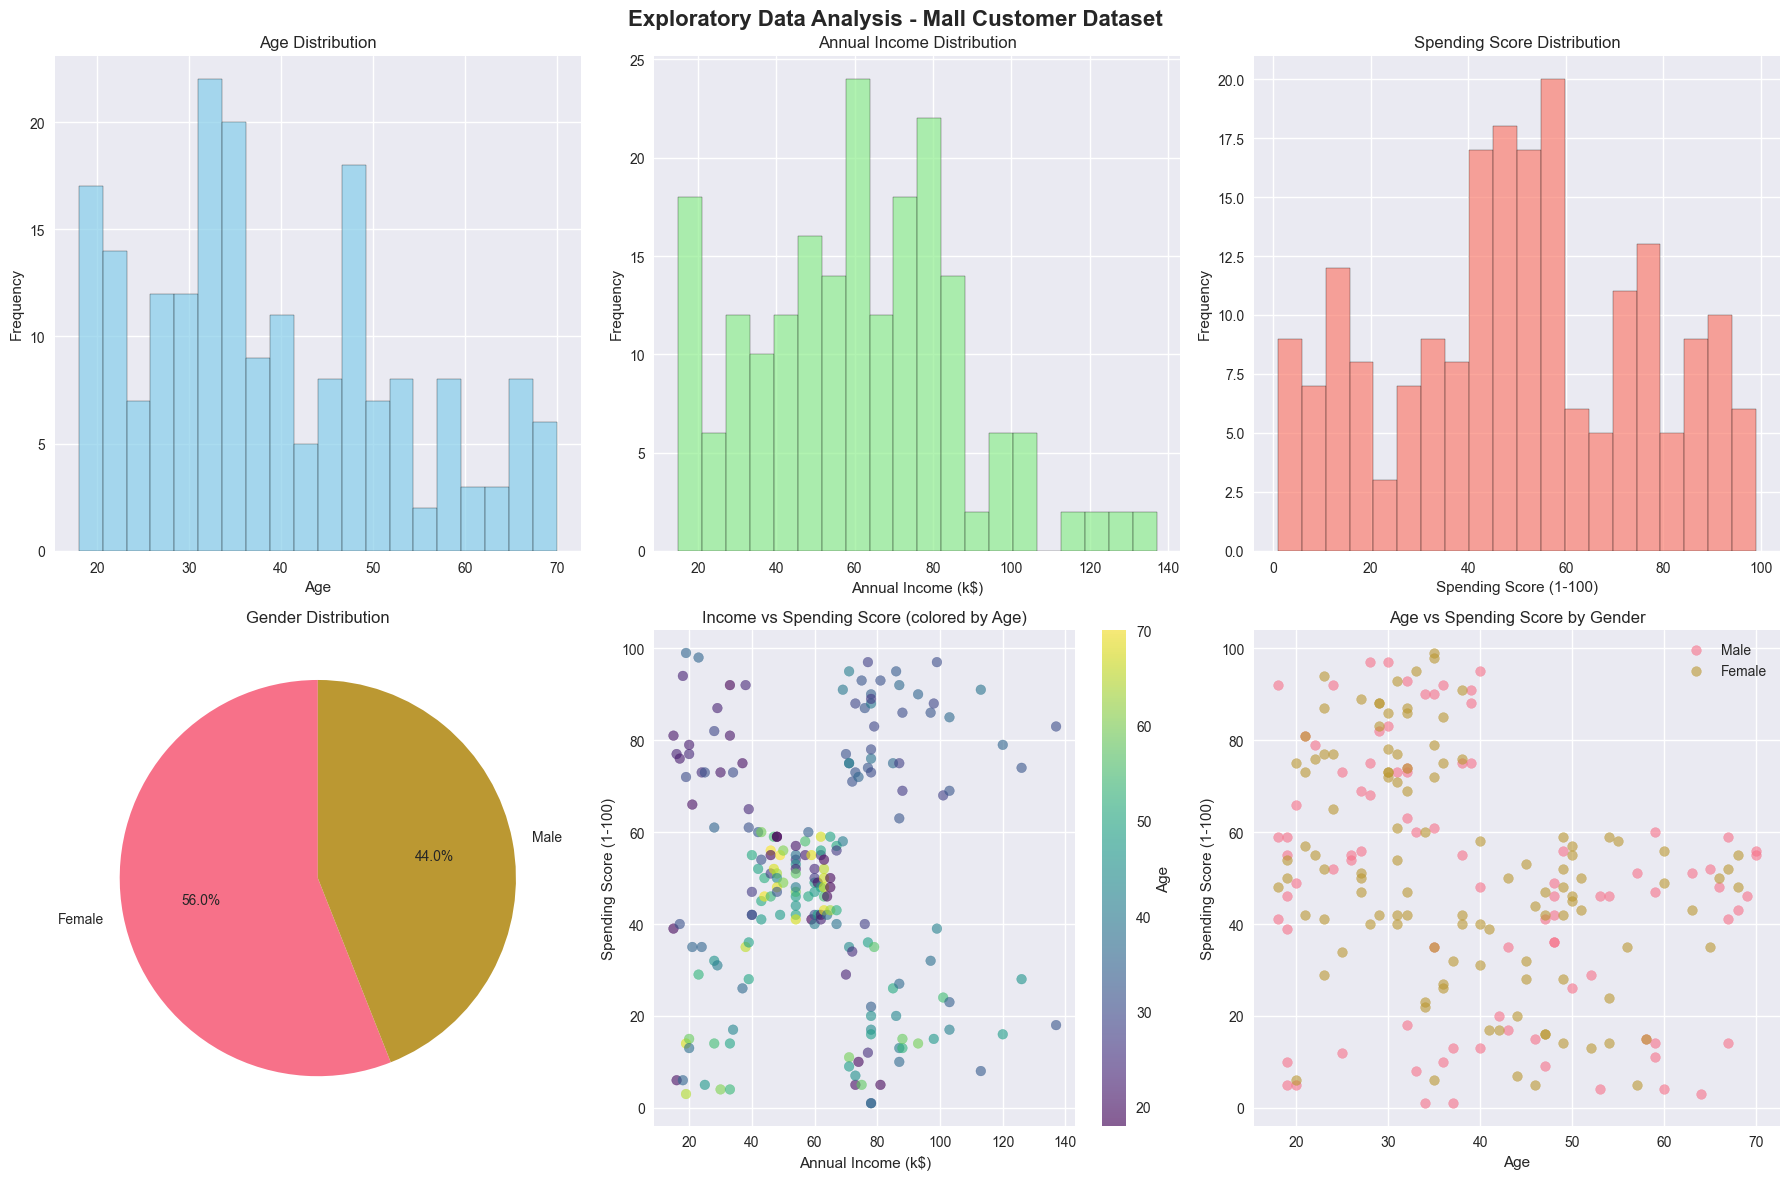

In [6]:
# Create comprehensive visualizations for data exploration
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Exploratory Data Analysis - Mall Customer Dataset', fontsize=16, fontweight='bold')

# Age distribution
axes[0, 0].hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Annual Income distribution
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score distribution
axes[0, 2].hist(df['Spending Score (1-100)'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[0, 2].set_title('Spending Score Distribution')
axes[0, 2].set_xlabel('Spending Score (1-100)')
axes[0, 2].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Gender Distribution')

# Income vs Spending Score scatter plot
scatter = axes[1, 1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                           c=df['Age'], cmap='viridis', alpha=0.6)
axes[1, 1].set_title('Income vs Spending Score (colored by Age)')
axes[1, 1].set_xlabel('Annual Income (k$)')
axes[1, 1].set_ylabel('Spending Score (1-100)')
plt.colorbar(scatter, ax=axes[1, 1], label='Age')

# Age vs Spending Score by Gender
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    axes[1, 2].scatter(gender_data['Age'], gender_data['Spending Score (1-100)'], 
                      label=gender, alpha=0.6)
axes[1, 2].set_title('Age vs Spending Score by Gender')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Spending Score (1-100)')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

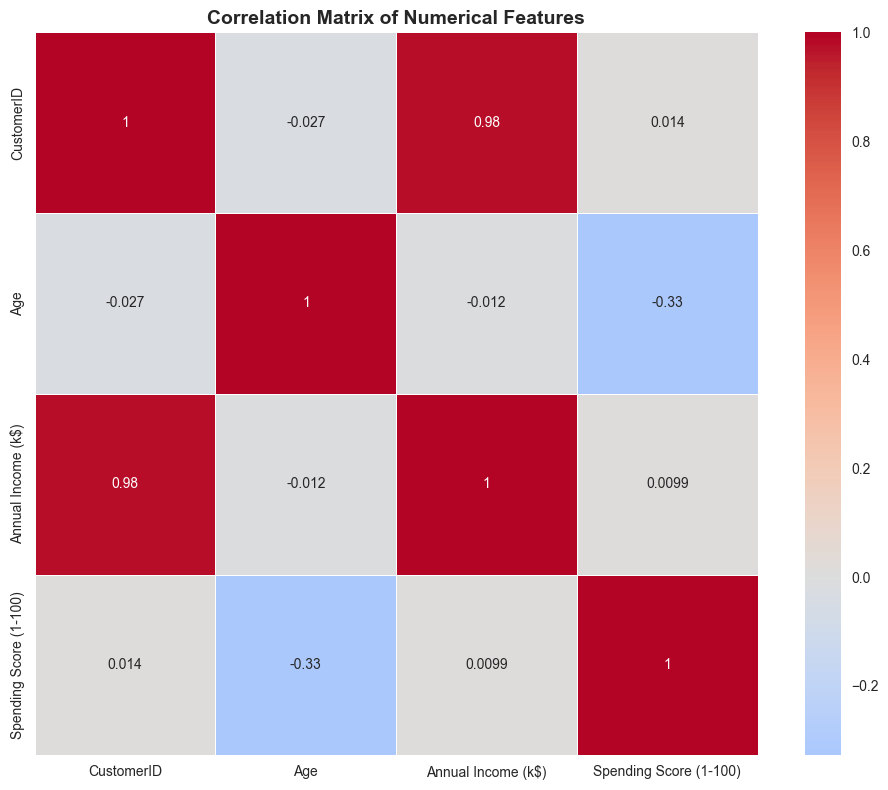

Key Observations from EDA:
• Age range: 18 - 70 years
• Income range: $15k - $137k
• Spending Score range: 1 - 99
• Gender distribution: {'Female': 112, 'Male': 88}
• Correlation between Income and Spending Score: 0.010


In [7]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Key Observations from EDA:")
print("=" * 40)
print(f"• Age range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"• Income range: ${df['Annual Income (k$)'].min()}k - ${df['Annual Income (k$)'].max()}k")
print(f"• Spending Score range: {df['Spending Score (1-100)'].min()} - {df['Spending Score (1-100)'].max()}")
print(f"• Gender distribution: {df['Gender'].value_counts().to_dict()}")
print(f"• Correlation between Income and Spending Score: {correlation_matrix.loc['Annual Income (k$)', 'Spending Score (1-100)']:.3f}")

## 4. Data Preprocessing and Feature Engineering

In [8]:
# Prepare data for clustering
# Focus on Annual Income and Spending Score as main clustering features
clustering_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[clustering_features].copy()

print("Original data for clustering:")
print(X.head())
print(f"\nShape: {X.shape}")

# Check for any missing values in clustering features
print(f"\nMissing values in clustering features: {X.isnull().sum().sum()}")

Original data for clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Shape: (200, 2)

Missing values in clustering features: 0


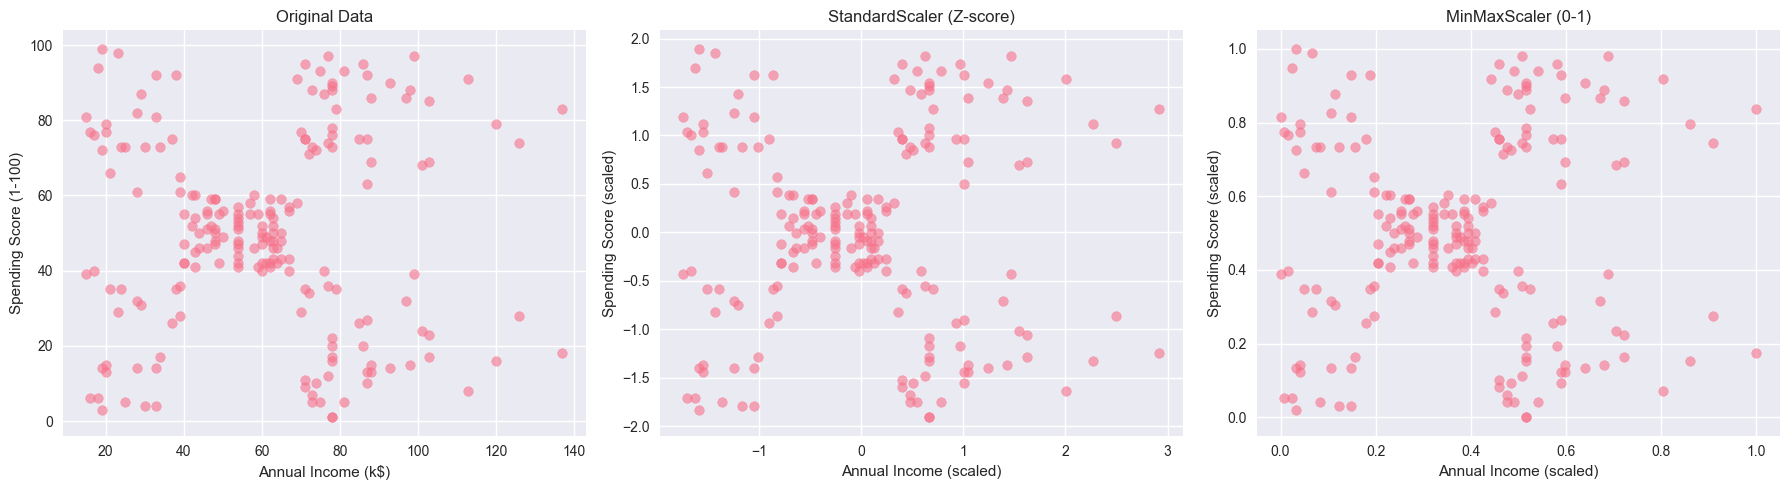


Using StandardScaler for clustering analysis.
Scaled data shape: (200, 2)
Scaled data statistics:
       Annual Income (k$)  Spending Score (1-100)
count        2.000000e+02            2.000000e+02
mean        -2.131628e-16           -1.465494e-16
std          1.002509e+00            1.002509e+00
min         -1.738999e+00           -1.910021e+00
25%         -7.275093e-01           -5.997931e-01
50%          3.587926e-02           -7.764312e-03
75%          6.656748e-01            8.851316e-01
max          2.917671e+00            1.894492e+00


In [9]:
# Feature Scaling - Compare different scaling methods
# StandardScaler (z-score normalization)
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X)
X_scaled_standard_df = pd.DataFrame(X_scaled_standard, columns=clustering_features)

# MinMaxScaler (0-1 normalization)
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)
X_scaled_minmax_df = pd.DataFrame(X_scaled_minmax, columns=clustering_features)

# Visualize the effect of scaling
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data
axes[0].scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], alpha=0.6)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')

# StandardScaler
axes[1].scatter(X_scaled_standard_df['Annual Income (k$)'], X_scaled_standard_df['Spending Score (1-100)'], alpha=0.6)
axes[1].set_title('StandardScaler (Z-score)')
axes[1].set_xlabel('Annual Income (scaled)')
axes[1].set_ylabel('Spending Score (scaled)')

# MinMaxScaler
axes[2].scatter(X_scaled_minmax_df['Annual Income (k$)'], X_scaled_minmax_df['Spending Score (1-100)'], alpha=0.6)
axes[2].set_title('MinMaxScaler (0-1)')
axes[2].set_xlabel('Annual Income (scaled)')
axes[2].set_ylabel('Spending Score (scaled)')

plt.tight_layout()
plt.show()

# Use StandardScaler for clustering (better for K-Means)
X_scaled = X_scaled_standard
print("\nUsing StandardScaler for clustering analysis.")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Scaled data statistics:\n{pd.DataFrame(X_scaled, columns=clustering_features).describe()}")

## 5. K-Means Clustering Analysis

### 5.1 Determining Optimal Number of Clusters

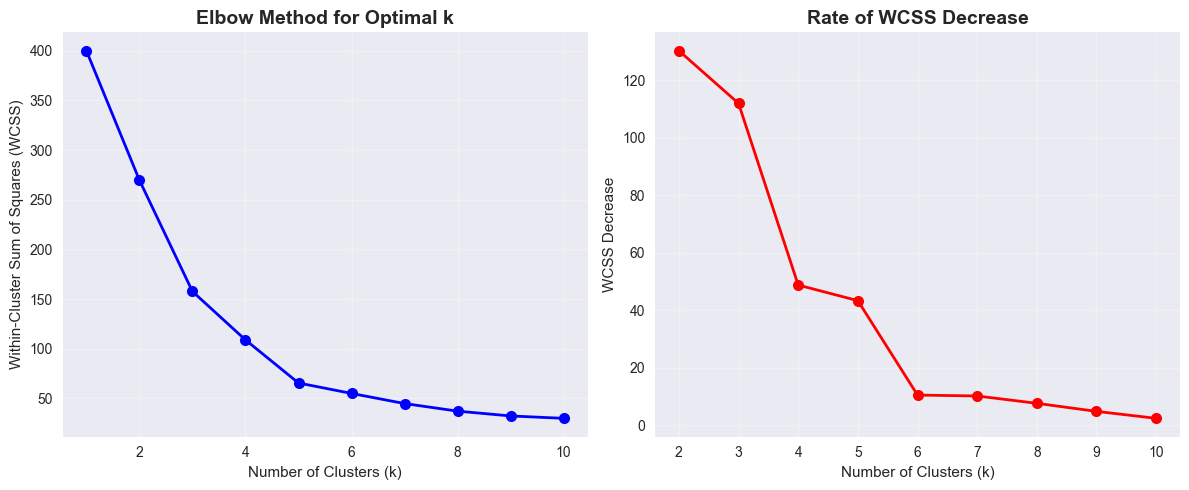

WCSS values for different k:
k=1: WCSS=400.00
k=2: WCSS=269.69
k=3: WCSS=157.70
k=4: WCSS=108.92
k=5: WCSS=65.57
k=6: WCSS=55.06
k=7: WCSS=44.86
k=8: WCSS=37.23
k=9: WCSS=32.39
k=10: WCSS=29.98


In [10]:
# Elbow Method for optimal number of clusters
def calculate_elbow_method(X, max_clusters=10):
    """
    Calculate Within-Cluster Sum of Squares (WCSS) for different number of clusters
    """
    wcss = []
    k_range = range(1, max_clusters + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    return k_range, wcss

# Calculate WCSS for different k values
k_range, wcss = calculate_elbow_method(X_scaled, max_clusters=10)

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True, alpha=0.3)

# Calculate the rate of change to identify elbow
rate_of_change = []
for i in range(1, len(wcss)):
    rate_of_change.append(wcss[i-1] - wcss[i])

plt.subplot(1, 2, 2)
plt.plot(k_range[1:], rate_of_change, 'ro-', linewidth=2, markersize=8)
plt.title('Rate of WCSS Decrease', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS Decrease')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("WCSS values for different k:")
for k, wcss_val in zip(k_range, wcss):
    print(f"k={k}: WCSS={wcss_val:.2f}")

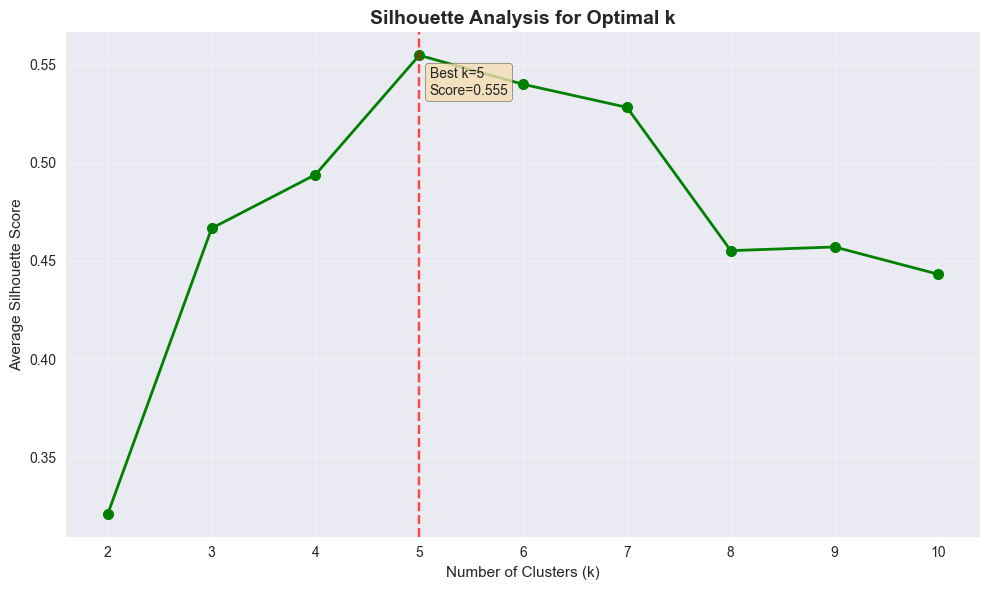

Silhouette scores for different k:
k=2: Silhouette Score=0.3213
k=3: Silhouette Score=0.4666
k=4: Silhouette Score=0.4939
k=5: Silhouette Score=0.5547
k=6: Silhouette Score=0.5399
k=7: Silhouette Score=0.5281
k=8: Silhouette Score=0.4552
k=9: Silhouette Score=0.4571
k=10: Silhouette Score=0.4432

Optimal number of clusters based on Silhouette Analysis: 5
Best Silhouette Score: 0.5547


In [11]:
# Silhouette Analysis for optimal number of clusters
def calculate_silhouette_scores(X, max_clusters=10):
    """
    Calculate silhouette scores for different number of clusters
    """
    silhouette_scores = []
    k_range = range(2, max_clusters + 1)  # Silhouette score requires at least 2 clusters
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    return k_range, silhouette_scores

# Calculate silhouette scores
k_range_sil, silhouette_scores = calculate_silhouette_scores(X_scaled, max_clusters=10)

# Plot Silhouette Analysis
plt.figure(figsize=(10, 6))
plt.plot(k_range_sil, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.title('Silhouette Analysis for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True, alpha=0.3)

# Highlight the best k
best_k = k_range_sil[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)
plt.text(best_k + 0.1, best_score - 0.02, f'Best k={best_k}\nScore={best_score:.3f}', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("Silhouette scores for different k:")
for k, score in zip(k_range_sil, silhouette_scores):
    print(f"k={k}: Silhouette Score={score:.4f}")

print(f"\nOptimal number of clusters based on Silhouette Analysis: {best_k}")
print(f"Best Silhouette Score: {best_score:.4f}")

### 5.2 K-Means Clustering Implementation

In [12]:
# Based on the analysis above, let's use k=5 (commonly optimal for this dataset)
# You can adjust this based on your elbow method and silhouette analysis results
optimal_k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Get cluster centers (in original scale)
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler_standard.inverse_transform(cluster_centers_scaled)

print(f"K-Means Clustering completed with k={optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")
print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")

print("\nCluster Centers (Original Scale):")
centers_df = pd.DataFrame(cluster_centers_original, columns=clustering_features)
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]
print(centers_df)

print("\nCluster Distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} customers ({count/len(df)*100:.1f}%)")

K-Means Clustering completed with k=5
Silhouette Score: 0.5547
Inertia (WCSS): 65.57

Cluster Centers (Original Scale):
           Annual Income (k$)  Spending Score (1-100)
Cluster 0           55.296296               49.518519
Cluster 1           86.538462               82.128205
Cluster 2           25.727273               79.363636
Cluster 3           88.200000               17.114286
Cluster 4           26.304348               20.913043

Cluster Distribution:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.5%)
Cluster 4: 23 customers (11.5%)


## 6. Cluster Visualization and Analysis

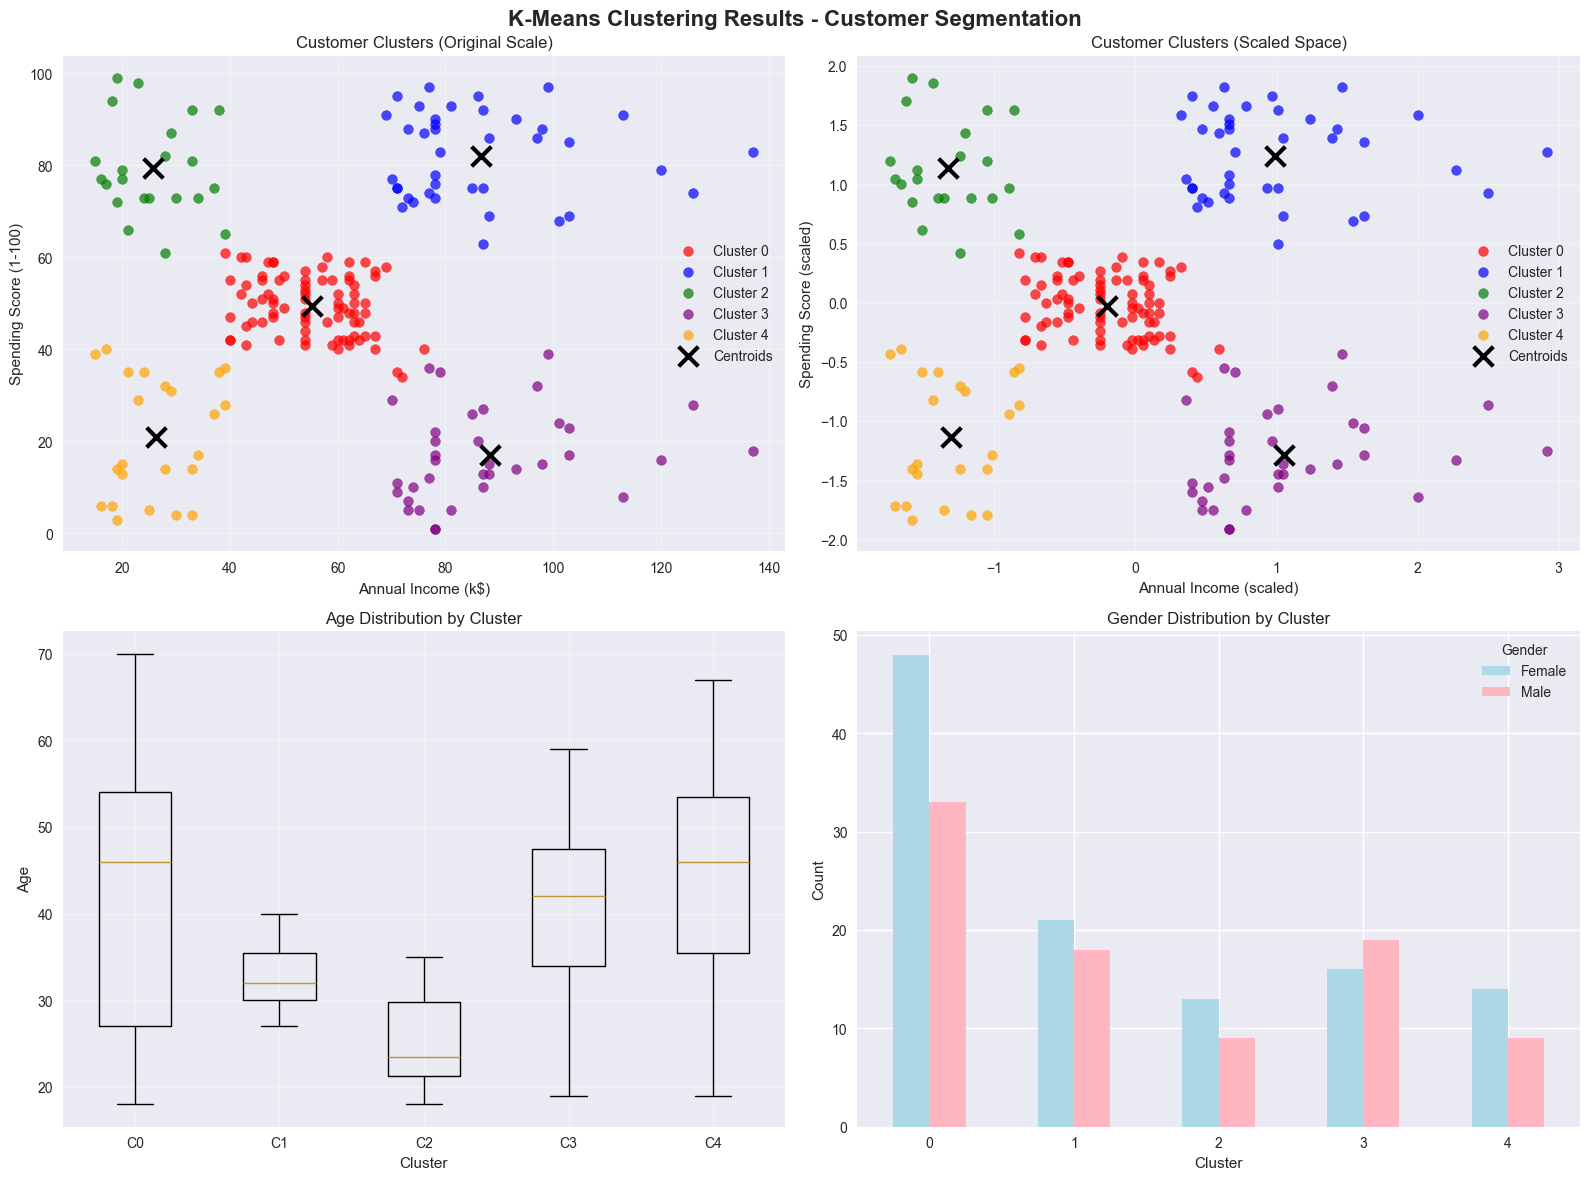

In [13]:
# Create comprehensive cluster visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('K-Means Clustering Results - Customer Segmentation', fontsize=16, fontweight='bold')

# Define colors for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot 1: Clusters in original scale
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    axes[0, 0].scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                      c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

# Plot cluster centers
axes[0, 0].scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1], 
                  c='black', marker='x', s=200, linewidths=3, label='Centroids')
axes[0, 0].set_title('Customer Clusters (Original Scale)')
axes[0, 0].set_xlabel('Annual Income (k$)')
axes[0, 0].set_ylabel('Spending Score (1-100)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Clusters in scaled space
for i in range(optimal_k):
    cluster_mask = cluster_labels == i
    axes[0, 1].scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], 
                      c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

axes[0, 1].scatter(cluster_centers_scaled[:, 0], cluster_centers_scaled[:, 1], 
                  c='black', marker='x', s=200, linewidths=3, label='Centroids')
axes[0, 1].set_title('Customer Clusters (Scaled Space)')
axes[0, 1].set_xlabel('Annual Income (scaled)')
axes[0, 1].set_ylabel('Spending Score (scaled)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Age distribution by cluster
cluster_ages = [df_clustered[df_clustered['Cluster'] == i]['Age'] for i in range(optimal_k)]
axes[1, 0].boxplot(cluster_ages, labels=[f'C{i}' for i in range(optimal_k)])
axes[1, 0].set_title('Age Distribution by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Age')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Gender distribution by cluster
gender_cluster = pd.crosstab(df_clustered['Cluster'], df_clustered['Gender'])
gender_cluster.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'lightpink'])
axes[1, 1].set_title('Gender Distribution by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Gender')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [14]:
# Detailed cluster analysis
print("DETAILED CLUSTER ANALYSIS")
print("=" * 50)

cluster_analysis = df_clustered.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)

cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns]
cluster_analysis = cluster_analysis.rename(columns={'CustomerID_count': 'Customer_Count'})

print(cluster_analysis)

# Calculate average spending per cluster (business insight)
print("\nAVERAGE METRICS BY CLUSTER:")
print("=" * 40)

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_age = cluster_data['Age'].mean()
    count = len(cluster_data)
    
    # Calculate estimated annual spending (assuming spending score correlates with actual spending)
    # This is a business assumption for demonstration
    estimated_annual_spending = avg_income * (avg_spending / 100) * 1000  # in dollars
    
    print(f"\nCluster {cluster_id} ({count} customers, {count/len(df)*100:.1f}%):")
    print(f"  • Average Age: {avg_age:.1f} years")
    print(f"  • Average Income: ${avg_income:.1f}k")
    print(f"  • Average Spending Score: {avg_spending:.1f}/100")
    print(f"  • Estimated Annual Spending: ${estimated_annual_spending:,.0f}")
    
    # Gender distribution
    gender_dist = cluster_data['Gender'].value_counts()
    print(f"  • Gender: {dict(gender_dist)}")

DETAILED CLUSTER ANALYSIS
         Age_mean  Age_std  Age_min  Age_max  Annual Income (k$)_mean  \
Cluster                                                                 
0           42.72    16.45       18       70                    55.30   
1           32.69     3.73       27       40                    86.54   
2           25.27     5.26       18       35                    25.73   
3           41.11    11.34       19       59                    88.20   
4           45.22    13.23       19       67                    26.30   

         Annual Income (k$)_std  Annual Income (k$)_min  \
Cluster                                                   
0                          8.99                      39   
1                         16.31                      69   
2                          7.57                      15   
3                         16.40                      70   
4                          7.89                      15   

         Annual Income (k$)_max  Spending Score 

## 7. Alternative Clustering: DBSCAN

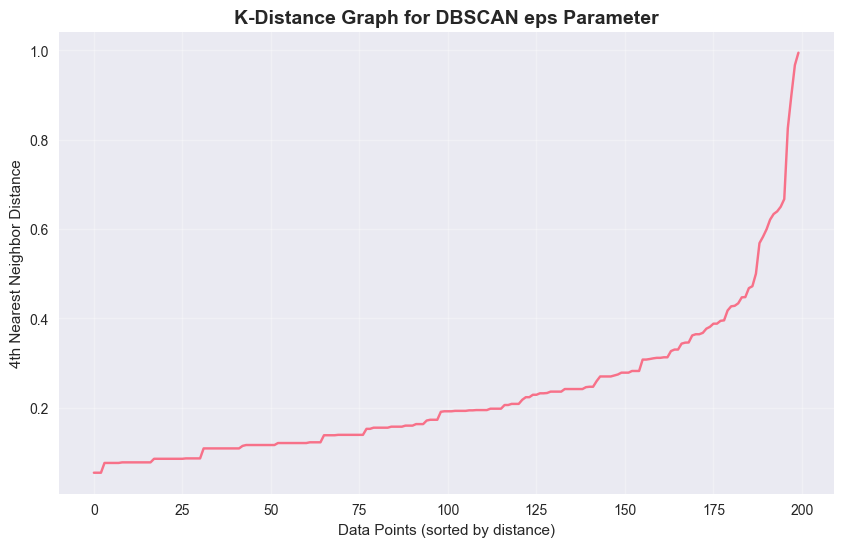

DBSCAN Results for different eps values:
eps=0.3: 7 clusters, 35 noise points, Silhouette=0.5243
eps=0.4: 4 clusters, 15 noise points, Silhouette=0.4781
eps=0.5: 2 clusters, 8 noise points, Silhouette=0.3876
eps=0.6: 1 clusters, 5 noise points, Silhouette=0.0000
eps=0.7: 1 clusters, 0 noise points, Silhouette=0.0000

Best DBSCAN configuration: eps=0.3, Silhouette Score=0.5243


In [15]:
# DBSCAN Clustering for comparison
from sklearn.neighbors import NearestNeighbors

# Find optimal eps parameter using k-distance graph
def find_optimal_eps(X, k=4):
    """
    Find optimal eps parameter for DBSCAN using k-distance graph
    """
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, k-1], axis=0)
    return distances

# Calculate k-distance
k_distances = find_optimal_eps(X_scaled, k=4)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title('K-Distance Graph for DBSCAN eps Parameter', fontsize=14, fontweight='bold')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True, alpha=0.3)
plt.show()

# Apply DBSCAN with different eps values
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples = 5

print("DBSCAN Results for different eps values:")
print("=" * 45)

best_eps = None
best_score = -1
best_labels = None

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    
    if n_clusters > 1:  # Need at least 2 clusters for silhouette score
        # Calculate silhouette score (excluding noise points)
        if n_noise < len(dbscan_labels):  # If not all points are noise
            mask = dbscan_labels != -1
            if len(set(dbscan_labels[mask])) > 1:
                sil_score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
                if sil_score > best_score:
                    best_score = sil_score
                    best_eps = eps
                    best_labels = dbscan_labels
            else:
                sil_score = 0
        else:
            sil_score = 0
    else:
        sil_score = 0
    
    print(f"eps={eps}: {n_clusters} clusters, {n_noise} noise points, Silhouette={sil_score:.4f}")

print(f"\nBest DBSCAN configuration: eps={best_eps}, Silhouette Score={best_score:.4f}")

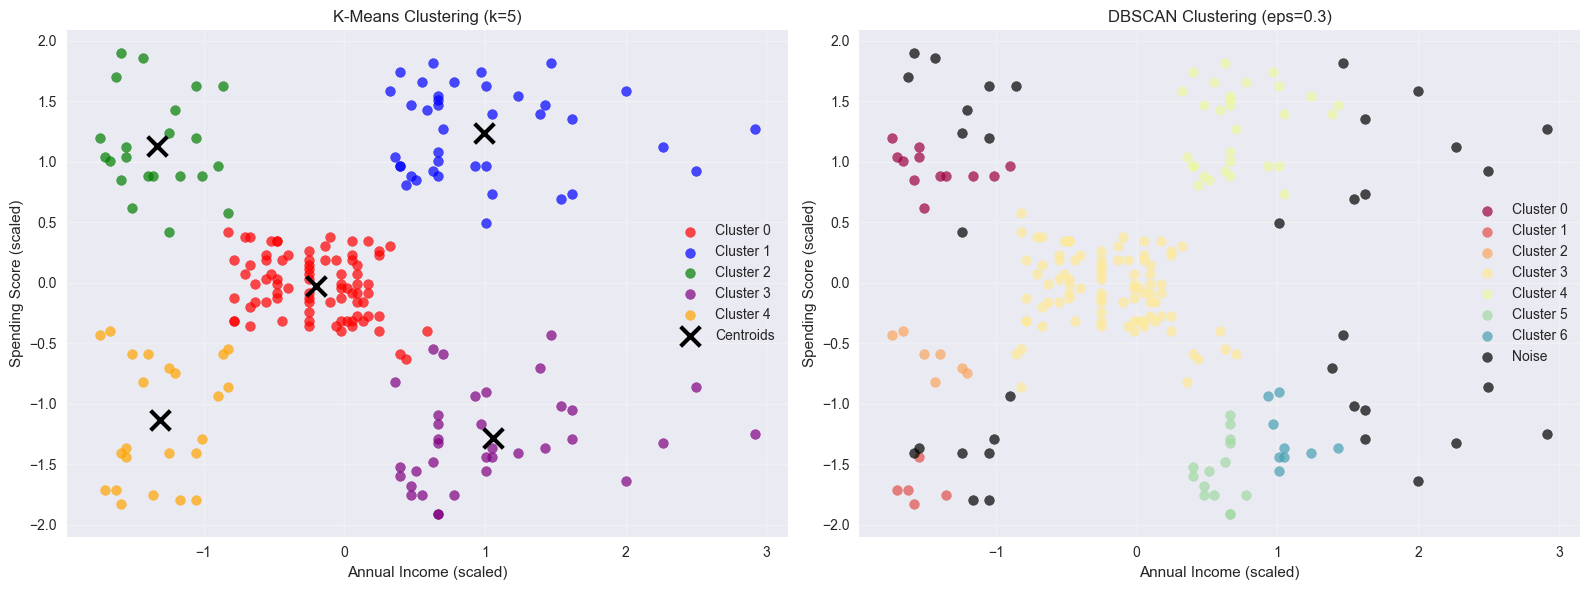


CLUSTERING COMPARISON:
K-Means: 5 clusters, Silhouette Score: 0.5547
DBSCAN: 7 clusters, 35 noise points, Silhouette Score: 0.5243


In [16]:
# Visualize DBSCAN results vs K-Means
if best_labels is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # K-Means results
    for i in range(optimal_k):
        cluster_mask = cluster_labels == i
        axes[0].scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], 
                       c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)
    axes[0].scatter(cluster_centers_scaled[:, 0], cluster_centers_scaled[:, 1], 
                   c='black', marker='x', s=200, linewidths=3, label='Centroids')
    axes[0].set_title(f'K-Means Clustering (k={optimal_k})')
    axes[0].set_xlabel('Annual Income (scaled)')
    axes[0].set_ylabel('Spending Score (scaled)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # DBSCAN results
    unique_labels = set(best_labels)
    colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors_dbscan):
        if k == -1:
            # Black used for noise
            col = [0, 0, 0, 1]
            label = 'Noise'
        else:
            label = f'Cluster {k}'
        
        class_member_mask = (best_labels == k)
        xy = X_scaled[class_member_mask]
        axes[1].scatter(xy[:, 0], xy[:, 1], c=[col], label=label, alpha=0.7, s=50)
    
    axes[1].set_title(f'DBSCAN Clustering (eps={best_eps})')
    axes[1].set_xlabel('Annual Income (scaled)')
    axes[1].set_ylabel('Spending Score (scaled)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Compare clustering results
    print("\nCLUSTERING COMPARISON:")
    print("=" * 30)
    print(f"K-Means: {optimal_k} clusters, Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")
    
    n_clusters_dbscan = len(set(best_labels)) - (1 if -1 in best_labels else 0)
    n_noise_dbscan = list(best_labels).count(-1)
    print(f"DBSCAN: {n_clusters_dbscan} clusters, {n_noise_dbscan} noise points, Silhouette Score: {best_score:.4f}")
else:
    print("DBSCAN did not produce valid clustering results with the tested parameters.")

## 8. Business Insights and Customer Segment Profiling

In [17]:
# Create customer segment profiles based on clustering results
def create_segment_profiles(df_clustered, optimal_k):
    """
    Create detailed customer segment profiles with business insights
    """
    segment_profiles = {}
    
    for cluster_id in range(optimal_k):
        cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
        
        profile = {
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(df_clustered) * 100,
            'avg_age': cluster_data['Age'].mean(),
            'avg_income': cluster_data['Annual Income (k$)'].mean(),
            'avg_spending_score': cluster_data['Spending Score (1-100)'].mean(),
            'gender_distribution': cluster_data['Gender'].value_counts().to_dict(),
            'age_range': (cluster_data['Age'].min(), cluster_data['Age'].max()),
            'income_range': (cluster_data['Annual Income (k$)'].min(), cluster_data['Annual Income (k$)'].max()),
            'spending_range': (cluster_data['Spending Score (1-100)'].min(), cluster_data['Spending Score (1-100)'].max())
        }
        
        # Business segment naming based on income and spending patterns
        if profile['avg_income'] < 40 and profile['avg_spending_score'] < 40:
            segment_name = "Budget Conscious"
            business_strategy = "Focus on value deals, discounts, and essential items"
        elif profile['avg_income'] < 40 and profile['avg_spending_score'] > 60:
            segment_name = "Young Spenders"
            business_strategy = "Target with trendy, affordable products and payment plans"
        elif profile['avg_income'] > 60 and profile['avg_spending_score'] < 40:
            segment_name = "Conservative High Earners"
            business_strategy = "Emphasize quality, durability, and long-term value"
        elif profile['avg_income'] > 60 and profile['avg_spending_score'] > 60:
            segment_name = "Premium Customers"
            business_strategy = "Offer luxury products, exclusive services, and VIP experiences"
        else:
            segment_name = "Moderate Customers"
            business_strategy = "Balanced approach with mid-range products and services"
        
        profile['segment_name'] = segment_name
        profile['business_strategy'] = business_strategy
        
        segment_profiles[cluster_id] = profile
    
    return segment_profiles

# Generate segment profiles
segment_profiles = create_segment_profiles(df_clustered, optimal_k)

print("CUSTOMER SEGMENT PROFILES & BUSINESS INSIGHTS")
print("=" * 60)

for cluster_id, profile in segment_profiles.items():
    print(f"\n🎯 CLUSTER {cluster_id}: {profile['segment_name'].upper()}")
    print("-" * 50)
    print(f"📊 Size: {profile['size']} customers ({profile['percentage']:.1f}% of total)")
    print(f"👥 Demographics:")
    print(f"   • Average Age: {profile['avg_age']:.1f} years (Range: {profile['age_range'][0]}-{profile['age_range'][1]})")
    print(f"   • Gender: {profile['gender_distribution']}")
    print(f"💰 Financial Profile:")
    print(f"   • Average Income: ${profile['avg_income']:.1f}k (Range: ${profile['income_range'][0]}-${profile['income_range'][1]}k)")
    print(f"   • Average Spending Score: {profile['avg_spending_score']:.1f}/100 (Range: {profile['spending_range'][0]}-{profile['spending_range'][1]})")
    print(f"🎯 Business Strategy: {profile['business_strategy']}")
    
    # Calculate estimated revenue potential
    estimated_spending = profile['avg_income'] * (profile['avg_spending_score'] / 100) * 1000
    total_segment_value = estimated_spending * profile['size']
    print(f"💵 Revenue Potential: ${estimated_spending:,.0f} per customer, ${total_segment_value:,.0f} total segment")

CUSTOMER SEGMENT PROFILES & BUSINESS INSIGHTS

🎯 CLUSTER 0: MODERATE CUSTOMERS
--------------------------------------------------
📊 Size: 81 customers (40.5% of total)
👥 Demographics:
   • Average Age: 42.7 years (Range: 18-70)
   • Gender: {'Female': 48, 'Male': 33}
💰 Financial Profile:
   • Average Income: $55.3k (Range: $39-$76k)
   • Average Spending Score: 49.5/100 (Range: 34-61)
🎯 Business Strategy: Balanced approach with mid-range products and services
💵 Revenue Potential: $27,382 per customer, $2,217,934 total segment

🎯 CLUSTER 1: PREMIUM CUSTOMERS
--------------------------------------------------
📊 Size: 39 customers (19.5% of total)
👥 Demographics:
   • Average Age: 32.7 years (Range: 27-40)
   • Gender: {'Female': 21, 'Male': 18}
💰 Financial Profile:
   • Average Income: $86.5k (Range: $69-$137k)
   • Average Spending Score: 82.1/100 (Range: 63-97)
🎯 Business Strategy: Offer luxury products, exclusive services, and VIP experiences
💵 Revenue Potential: $71,072 per customer,

## 9. Summary and Recommendations

In [18]:
# Final summary and actionable recommendations
print("📋 PROJECT SUMMARY & KEY FINDINGS")
print("=" * 50)
print(f"✅ Successfully segmented {len(df)} customers into {optimal_k} distinct clusters")
print(f"✅ Achieved silhouette score of {silhouette_score(X_scaled, cluster_labels):.4f} with K-Means")
print(f"✅ Identified clear patterns in customer income and spending behavior")
print(f"✅ Compared K-Means with DBSCAN clustering algorithm")

print("\n🎯 KEY BUSINESS INSIGHTS:")
print("-" * 30)

# Calculate total revenue potential by segment
total_revenue_potential = 0
high_value_segments = []

for cluster_id, profile in segment_profiles.items():
    estimated_spending = profile['avg_income'] * (profile['avg_spending_score'] / 100) * 1000
    segment_value = estimated_spending * profile['size']
    total_revenue_potential += segment_value
    
    if profile['avg_spending_score'] > 60:
        high_value_segments.append((cluster_id, profile['segment_name'], segment_value))

print(f"💰 Total estimated revenue potential: ${total_revenue_potential:,.0f}")
print(f"🏆 High-value segments identified: {len(high_value_segments)}")

if high_value_segments:
    print("\n🌟 TOP PRIORITY SEGMENTS:")
    for cluster_id, name, value in sorted(high_value_segments, key=lambda x: x[2], reverse=True):
        percentage = (value / total_revenue_potential) * 100
        print(f"   • Cluster {cluster_id} ({name}): ${value:,.0f} ({percentage:.1f}% of total)")

print("\n📈 ACTIONABLE RECOMMENDATIONS:")
print("-" * 35)
print("1. 🎯 TARGETED MARKETING:")
print("   • Develop segment-specific marketing campaigns")
print("   • Customize product recommendations by cluster")
print("   • Adjust pricing strategies per segment")

print("\n2. 💼 RESOURCE ALLOCATION:")
print("   • Prioritize high-spending score segments for premium services")
print("   • Allocate customer service resources based on segment value")
print("   • Focus inventory on products preferred by each segment")

print("\n3. 📊 PERFORMANCE MONITORING:")
print("   • Track segment migration over time")
print("   • Monitor spending pattern changes")
print("   • Measure campaign effectiveness by segment")

print("\n4. 🔄 CONTINUOUS IMPROVEMENT:")
print("   • Re-run clustering analysis quarterly")
print("   • Incorporate additional features (purchase history, seasonality)")
print("   • Test different clustering algorithms as data grows")

print("\n" + "=" * 60)
print("🎉 CUSTOMER SEGMENTATION ANALYSIS COMPLETE!")
print("=" * 60)

📋 PROJECT SUMMARY & KEY FINDINGS
✅ Successfully segmented 200 customers into 5 distinct clusters
✅ Achieved silhouette score of 0.5547 with K-Means
✅ Identified clear patterns in customer income and spending behavior
✅ Compared K-Means with DBSCAN clustering algorithm

🎯 KEY BUSINESS INSIGHTS:
------------------------------
💰 Total estimated revenue potential: $6,093,801
🏆 High-value segments identified: 2

🌟 TOP PRIORITY SEGMENTS:
   • Cluster 1 (Premium Customers): $2,771,827 (45.5% of total)
   • Cluster 2 (Young Spenders): $449,198 (7.4% of total)

📈 ACTIONABLE RECOMMENDATIONS:
-----------------------------------
1. 🎯 TARGETED MARKETING:
   • Develop segment-specific marketing campaigns
   • Customize product recommendations by cluster
   • Adjust pricing strategies per segment

2. 💼 RESOURCE ALLOCATION:
   • Prioritize high-spending score segments for premium services
   • Allocate customer service resources based on segment value
   • Focus inventory on products preferred by each

---

## Technical Notes

### Libraries Used:
- **pandas & numpy**: Data manipulation and numerical operations
- **matplotlib & seaborn**: Static visualizations
- **plotly**: Interactive visualizations (optional)
- **scikit-learn**: Machine learning algorithms and preprocessing
- **scipy**: Statistical analysis

### Algorithms Implemented:
- **K-Means Clustering**: Primary clustering algorithm
- **DBSCAN**: Alternative density-based clustering
- **Elbow Method**: Optimal cluster number determination
- **Silhouette Analysis**: Cluster quality evaluation

### Key Metrics:
- **Within-Cluster Sum of Squares (WCSS)**: Measures cluster compactness
- **Silhouette Score**: Measures cluster separation and cohesion
- **Cluster Centers**: Representative points for each segment

### Business Applications:
- **Customer Segmentation**: Identify distinct customer groups
- **Targeted Marketing**: Develop segment-specific strategies
- **Resource Allocation**: Optimize business resource distribution
- **Revenue Optimization**: Focus on high-value customer segments

---

*This analysis provides a comprehensive foundation for data-driven customer segmentation and targeted business strategies.*